In [1]:
#Remove quotes to install dependencies and unzip data files
"""
!pip install Augmentor
!pip install pillow
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install keras
!pip install scikit-image
!unzip ./python/images_background.zip
!unzip ./python/images_background_small1.zip
!unzip ./python/images_background_small2.zip
!unzip ./python/images_evaluation.zip
"""

'\n!pip install Augmentor\n!pip install pillow\n!pip install pandas\n!pip install matplotlib\n!pip install numpy\n!pip install keras\n!pip install scikit-image\n!unzip ./python/images_background.zip\n!unzip ./python/images_background_small1.zip\n!unzip ./python/images_background_small2.zip\n!unzip ./python/images_evaluation.zip\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from load_data import load_directory, train_gen, val_gen, quiz_models, LossTracker
from build_models import make_convnet, make_capsnet, train_convnet, train_capsnet, plot_history
import tensorflow as tf
from keras.models import load_model, Sequential, Model
from keras.layers import Input
from capsulelayers import Length, Mask
from matplotlib.patches import Patch

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Set up for Angelic alphabet
batch_size = 30
alphabet = 'Angelic'
directory = './images_evaluation/{}/'.format(alphabet)
train, test, labels = load_directory(directory)
loss_tracker = LossTracker() #Tracks loss for augmentation schedule.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//19)
input_shape = (105, 105, 1)
n_class = len(labels)

Progress: [#########################] 100% Done...


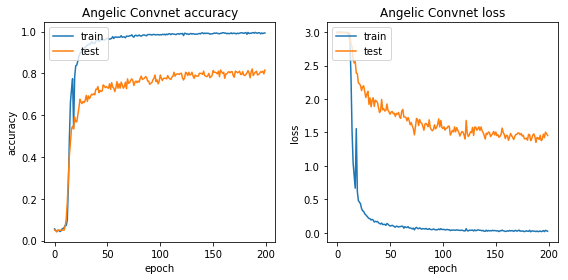

In [4]:
#Set "width" 42, results in 23,498,138 parameters.
convnet = make_convnet(input_shape, n_class, width=42, dropout=.5)

history = train_convnet(convnet, tg, vg, directory, loss_obj=loss_tracker, epochs=200)
plot_history(history, model_name='Angelic Convnet')


quizzing best accuracy model...

Quiz results: 323 out of 380 correct.
Quiz accuracy score: 0.85. Error rate: 0.15
Classification results: 312 out of 380 correct.
Classification accuracy score: 0.821. Error rate: 0.179

quizzing best loss model...



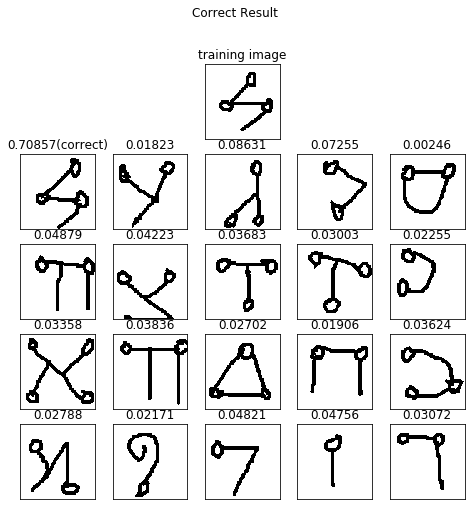

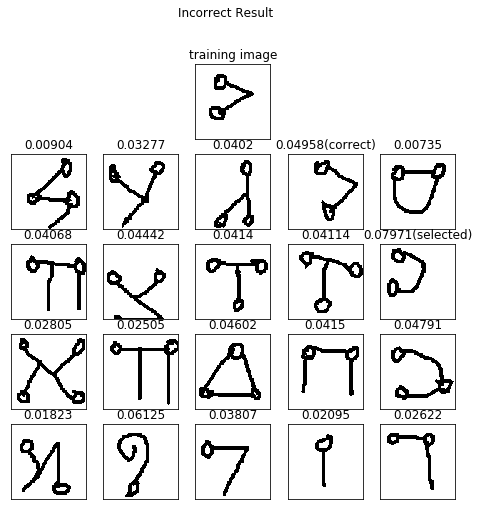

Quiz results: 319 out of 380 correct.
Quiz accuracy score: 0.839. Error rate: 0.161
Classification results: 300 out of 380 correct.
Classification accuracy score: 0.789. Error rate: 0.211

quizzing overfit model...

Quiz results: 323 out of 380 correct.
Quiz accuracy score: 0.85. Error rate: 0.15
Classification results: 310 out of 380 correct.
Classification accuracy score: 0.816. Error rate: 0.184


In [5]:
results1_Ang, results2_Ang, results3_Ang = quiz_models(directory, test, labels, visualize=True, train_df=train)

del convnet

Progress: [#########################] 100% Done...


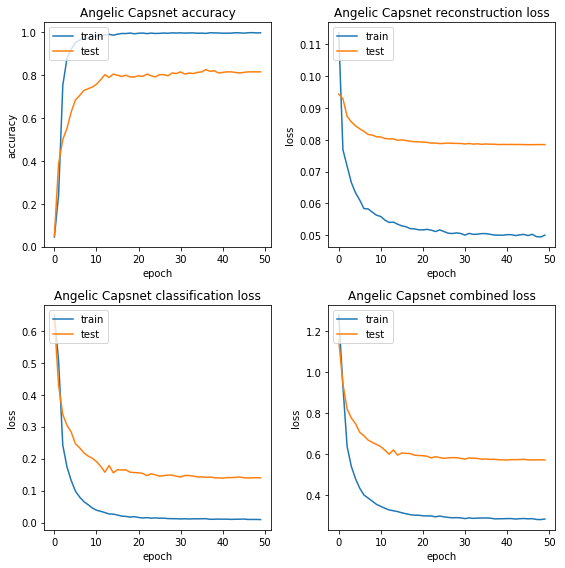

In [6]:
routings = 3
#Downweight the reconstruction loss as specified in the paper, by .0005
#And scale up by the number of pixels.
reconstruction_loss = .0005 * input_shape[0] * input_shape[1]
#Capsnet has 22,934,545 parameters
capsnet, eval_model, manipulate_model = make_capsnet(
    input_shape, 
    n_class, 
    routings, 
    reconstruction_loss, 
    lambda_downweight=.4
)

loss_tracker = LossTracker(scale_by=.1) #Advance augmentation schedule. Capsnet is robust to this.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//19)
val_steps = 19
history = train_capsnet(capsnet, tg, vg, directory, loss_obj=loss_tracker, validation_steps=val_steps, epochs=50)

plot_history(history, model_name='Angelic Capsnet', capsnet=True)


quizzing best accuracy model...

Quiz results: 323 out of 380 correct.
Quiz accuracy score: 0.85. Error rate: 0.15
Classification results: 314 out of 380 correct.
Classification accuracy score: 0.826. Error rate: 0.174

quizzing best loss model...



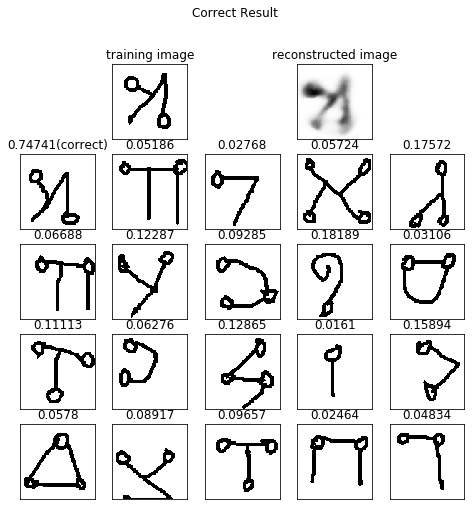

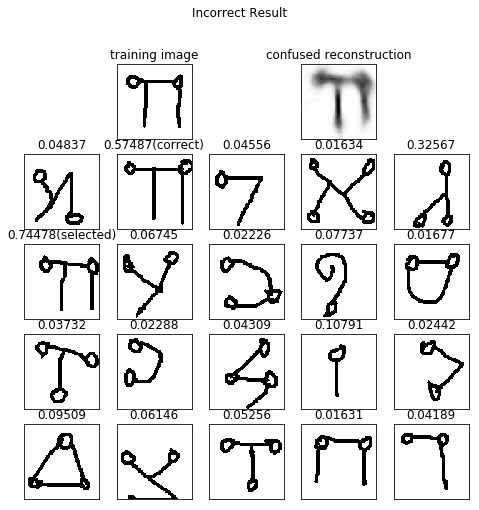

Quiz results: 325 out of 380 correct.
Quiz accuracy score: 0.855. Error rate: 0.145
Classification results: 309 out of 380 correct.
Classification accuracy score: 0.813. Error rate: 0.187

quizzing overfit model...

Quiz results: 325 out of 380 correct.
Quiz accuracy score: 0.855. Error rate: 0.145
Classification results: 310 out of 380 correct.
Classification accuracy score: 0.816. Error rate: 0.184


In [7]:
results_caps1_Ang, results_caps2_Ang, results_caps3_Ang = quiz_models(
    directory, 
    test, 
    labels, 
    capsnet=True, 
    visualize=True,
    eval_model=eval_model,
    train_df=train
)

del capsnet

In [8]:
#Set up for Atemayar Qelisayer alphabet
batch_size = 30
alphabet = 'Atemayar_Qelisayer'
directory = './images_evaluation/{}/'.format(alphabet)
train, test, labels = load_directory(directory)
loss_tracker = LossTracker() #Tracks loss for augmentation schedule.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//19)
input_shape = (105, 105, 1)
n_class = len(labels)

Progress: [#########################] 100% Done...


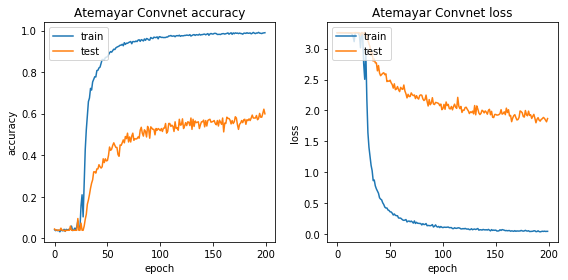

In [9]:
#Set "width" 43, results in 24,700,321 parameters.
convnet = make_convnet(input_shape, n_class, width=43, dropout=.5)

history = train_convnet(convnet, tg, vg, directory, loss_obj=loss_tracker, epochs=200)
plot_history(history, model_name='Atemayar Convnet')


quizzing best accuracy model...

Quiz results: 275 out of 380 correct.
Quiz accuracy score: 0.724. Error rate: 0.276
Classification results: 244 out of 380 correct.
Classification accuracy score: 0.642. Error rate: 0.358

quizzing best loss model...



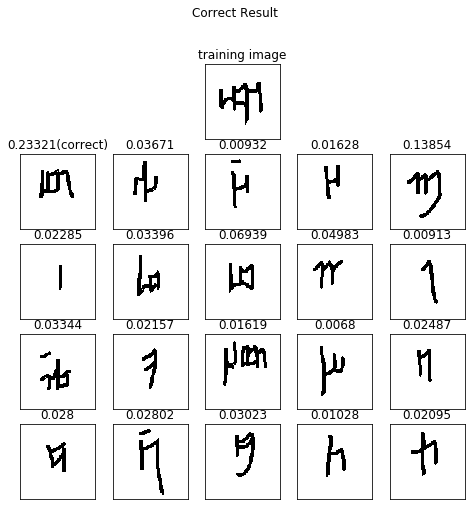

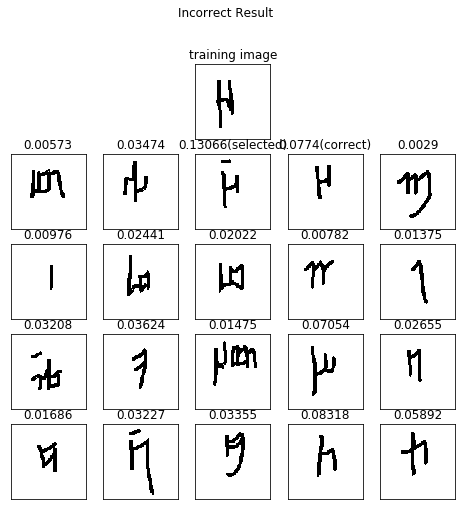

Quiz results: 268 out of 380 correct.
Quiz accuracy score: 0.705. Error rate: 0.295
Classification results: 227 out of 380 correct.
Classification accuracy score: 0.597. Error rate: 0.403

quizzing overfit model...

Quiz results: 267 out of 380 correct.
Quiz accuracy score: 0.703. Error rate: 0.297
Classification results: 234 out of 380 correct.
Classification accuracy score: 0.616. Error rate: 0.384


In [10]:
results1_AQ, results2_AQ, results3_AQ = quiz_models(directory, test, labels, visualize=True, train_df=train)

del convnet

Progress: [#########################] 100% Done...


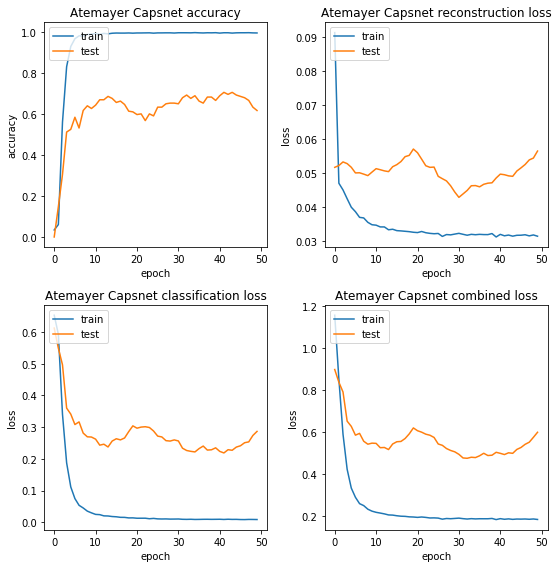

In [11]:
routings = 3
#Capsnet has 24,187,921 parameters
capsnet, eval_model, manipulate_model = make_capsnet(
    input_shape, 
    n_class, 
    routings, 
    reconstruction_loss, 
    lambda_downweight=.35
)

loss_tracker = LossTracker(scale_by=.1) #Advance augmentation schedule. Capsnet is robust to this.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//batch_size)
val_steps = 19
history = train_capsnet(capsnet, tg, vg, directory, loss_obj=loss_tracker, validation_steps=val_steps, epochs=50)

plot_history(history, model_name='Atemayer Capsnet', capsnet=True)


quizzing best accuracy model...

Quiz results: 290 out of 380 correct.
Quiz accuracy score: 0.763. Error rate: 0.237
Classification results: 265 out of 380 correct.
Classification accuracy score: 0.697. Error rate: 0.303

quizzing best loss model...



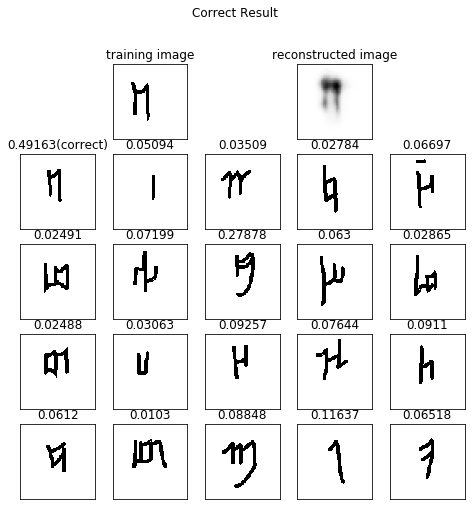

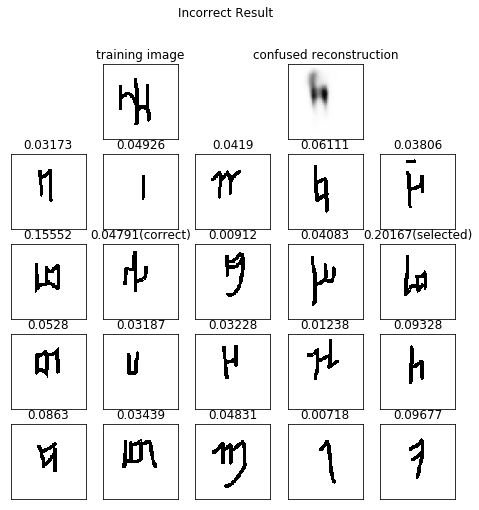

Quiz results: 281 out of 380 correct.
Quiz accuracy score: 0.739. Error rate: 0.261
Classification results: 255 out of 380 correct.
Classification accuracy score: 0.671. Error rate: 0.329

quizzing overfit model...

Quiz results: 277 out of 380 correct.
Quiz accuracy score: 0.729. Error rate: 0.271
Classification results: 252 out of 380 correct.
Classification accuracy score: 0.663. Error rate: 0.337


In [12]:
results_caps1_AQ, results_caps2_AQ, results_caps3_AQ = quiz_models(
    directory, 
    test, 
    labels, 
    capsnet=True, 
    visualize=True,
    eval_model=eval_model,
    train_df=train
)

del capsnet

In [13]:
#Set up for Oriya alphabet
batch_size = 30
alphabet = 'Oriya'
directory = './images_evaluation/{}/'.format(alphabet)
train, test, labels = load_directory(directory)
loss_tracker = LossTracker() #Tracks loss for augmentation schedule.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//19)
input_shape = (105, 105, 1)
n_class = len(labels)

Progress: [#########################] 100% Done...


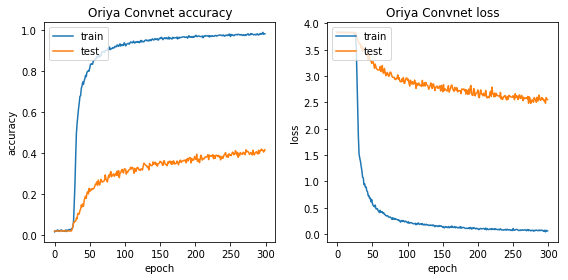

In [14]:
#Set "width" 47, results in 29,495,037 parameters.
convnet = make_convnet(input_shape, n_class, width=47, dropout=.5)

#This model benefits from additional epochs, so I give it an additional 100.
history = train_convnet(convnet, tg, vg, directory, loss_obj=loss_tracker, epochs=300)
plot_history(history, model_name='Oriya Convnet')


quizzing best accuracy model...

Quiz results: 206 out of 380 correct.
Quiz accuracy score: 0.542. Error rate: 0.458
Classification results: 153 out of 380 correct.
Classification accuracy score: 0.403. Error rate: 0.597

quizzing best loss model...



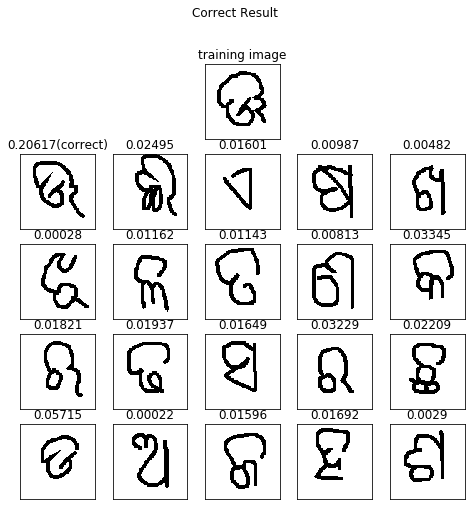

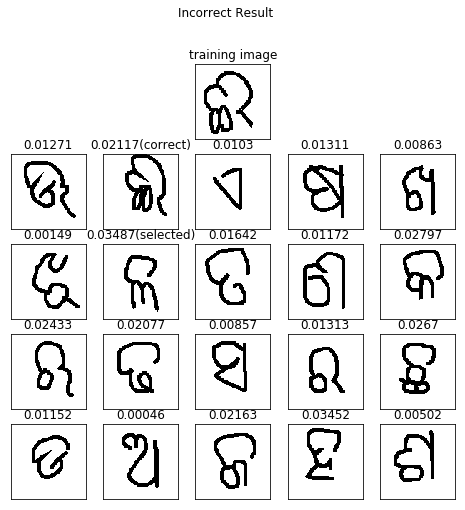

Quiz results: 224 out of 380 correct.
Quiz accuracy score: 0.589. Error rate: 0.411
Classification results: 175 out of 380 correct.
Classification accuracy score: 0.461. Error rate: 0.539

quizzing overfit model...

Quiz results: 216 out of 380 correct.
Quiz accuracy score: 0.568. Error rate: 0.432
Classification results: 161 out of 380 correct.
Classification accuracy score: 0.424. Error rate: 0.576


In [15]:
results1_Oya, results2_Oya, results3_Oya = quiz_models(directory, test, labels, visualize=True, train_df=train)

del convnet

Progress: [#########################] 100% Done...


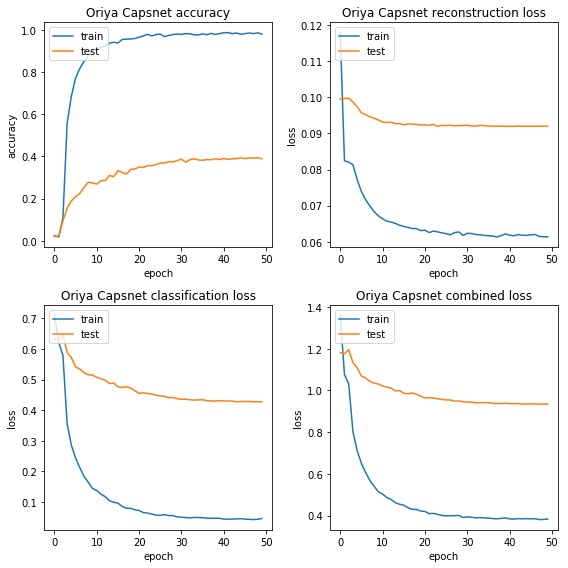

In [16]:
routings = 3
#capsnet has 28,365,841 parameters.
capsnet, eval_model, manipulate_model = make_capsnet(
    input_shape, 
    n_class, 
    routings, 
    reconstruction_loss, 
    lambda_downweight=.3 #lower this number for higher number of classes.
)

loss_tracker = LossTracker(scale_by=.1) #Advance augmentation schedule. Capsnet is robust to this.
tg = train_gen(train, labels, batch_size=batch_size, augmentation=True, loss_obj=loss_tracker)
vg = val_gen(test, labels, batch_size=len(test)//19)
val_steps = 19
history = train_capsnet(capsnet, tg, vg, directory, loss_obj=loss_tracker, validation_steps=val_steps, epochs=50)

plot_history(history, model_name='Oriya Capsnet', capsnet=True)


quizzing best accuracy model...

Quiz results: 204 out of 380 correct.
Quiz accuracy score: 0.537. Error rate: 0.463
Classification results: 152 out of 380 correct.
Classification accuracy score: 0.4. Error rate: 0.6

quizzing best loss model...



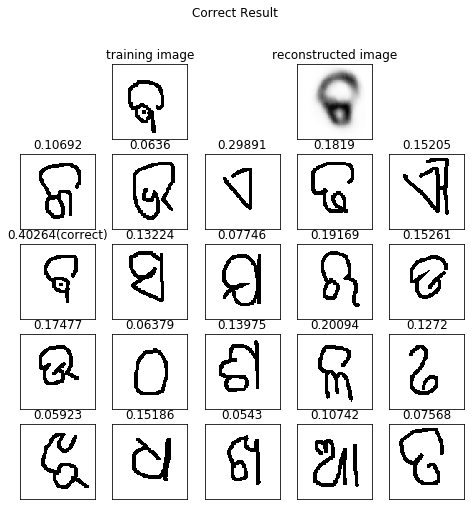

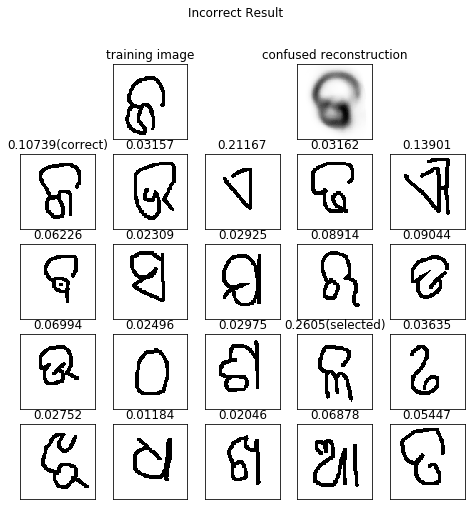

Quiz results: 195 out of 380 correct.
Quiz accuracy score: 0.513. Error rate: 0.487
Classification results: 150 out of 380 correct.
Classification accuracy score: 0.395. Error rate: 0.605

quizzing overfit model...

Quiz results: 204 out of 380 correct.
Quiz accuracy score: 0.537. Error rate: 0.463
Classification results: 152 out of 380 correct.
Classification accuracy score: 0.4. Error rate: 0.6


In [17]:
results_caps1_Oya, results_caps2_Oya, results_caps3_Oya = quiz_models(
    directory, 
    test, 
    labels, 
    capsnet=True, 
    visualize=True,
    eval_model=eval_model,
    train_df=train
)

del capsnet

In [18]:
def get_best_results(res1, res2, res3):
    results = [res1, res2, res3]
    best_quiz = 0
    best_class = 0
    for res in results:
        best_quiz = max(best_quiz, res[0])
        best_class = max(best_class, res[2])

    best_quiz /= results[0][1]
    best_class /= results[0][3]
    return best_quiz, best_class

bq_Ang, bc_Ang = get_best_results(results1_Ang, results2_Ang, results3_Ang)
bq_caps_Ang, bc_caps_Ang = get_best_results(results_caps1_Ang, results_caps2_Ang, results_caps3_Ang)
bq_AQ, bc_AQ = get_best_results(results1_AQ, results2_AQ, results3_AQ)
bq_caps_AQ, bc_caps_AQ = get_best_results(results_caps1_AQ, results_caps2_AQ, results_caps3_AQ)
bq_Oya, bc_Oya = get_best_results(results1_Oya, results2_Oya, results3_Oya)
bq_caps_Oya, bc_caps_Oya = get_best_results(results_caps1_Oya, results_caps2_Oya, results_caps3_Oya)

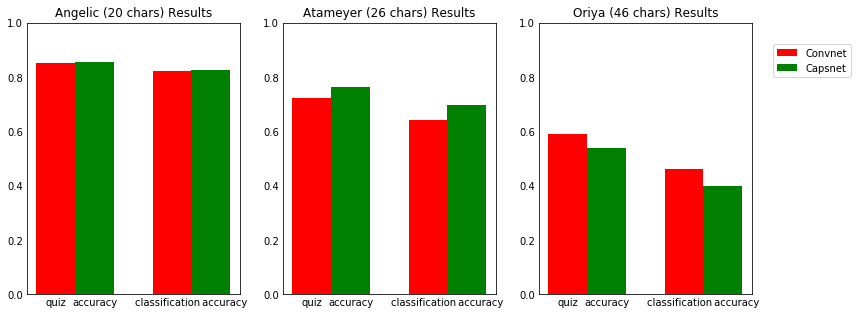

In [19]:
def setup_plot(ax, title, bq, bq_caps, bc, bc_caps):
    ax.set_title(title)
    ax.bar(
        [-1, -.5, .5, 1], 
        height=[bq, bq_caps, bc, bc_caps],
        width = .5,
        tick_label=['quiz', 'accuracy', 'classification   ', '         accuracy'],
        color=['red', 'green', 'red', 'green']
    )
    ax.set_ylim(0, 1)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    for tick in ax.get_xticklabels():
            tick.set_rotation(0)


fig, axs = plt.subplots(1, 3, figsize=(13, 5))
legend_elements = [
    Patch(facecolor='red', label='Convnet'),
    Patch(facecolor='green', label='Capsnet')
]
plt.legend(handles=legend_elements, loc=(1.1, .8))
setup_plot(axs[0], 'Angelic (20 chars) Results', bq_Ang, bq_caps_Ang, bc_Ang, bc_caps_Ang)
setup_plot(axs[1], 'Atameyer (26 chars) Results', bq_AQ, bq_caps_AQ, bc_AQ, bc_caps_AQ)
setup_plot(axs[2], 'Oriya (46 chars) Results', bq_Oya, bq_caps_Oya, bc_Oya, bc_caps_Oya)